World Happiness Report Project

In [63]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

Loading and Analysing data

In [30]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df=pd.DataFrame(data=data)
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [31]:
df.tail()

Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

In [32]:
df.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [33]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [34]:
df.shape

(158, 12)

In [35]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [36]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [37]:
# Happiness Rank is not giving any specific information,inversely propotional to score.
# Also Region is irrelevant.
df=df.drop(['Region','Country','Happiness Rank'],axis=1)

In [38]:
df

Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 9 columns]

Visualizing the data
Using an upper traingular Heatmap

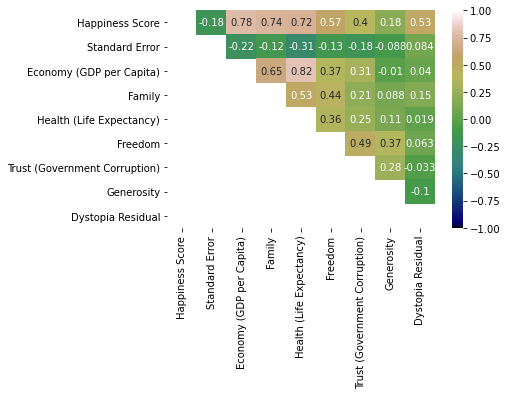

In [39]:
upper_triangle = np.tril(df.corr())
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,
            annot_kws={'size':10}, cmap="gist_earth", mask=upper_triangle)
plt.show()

Using a Pairplot

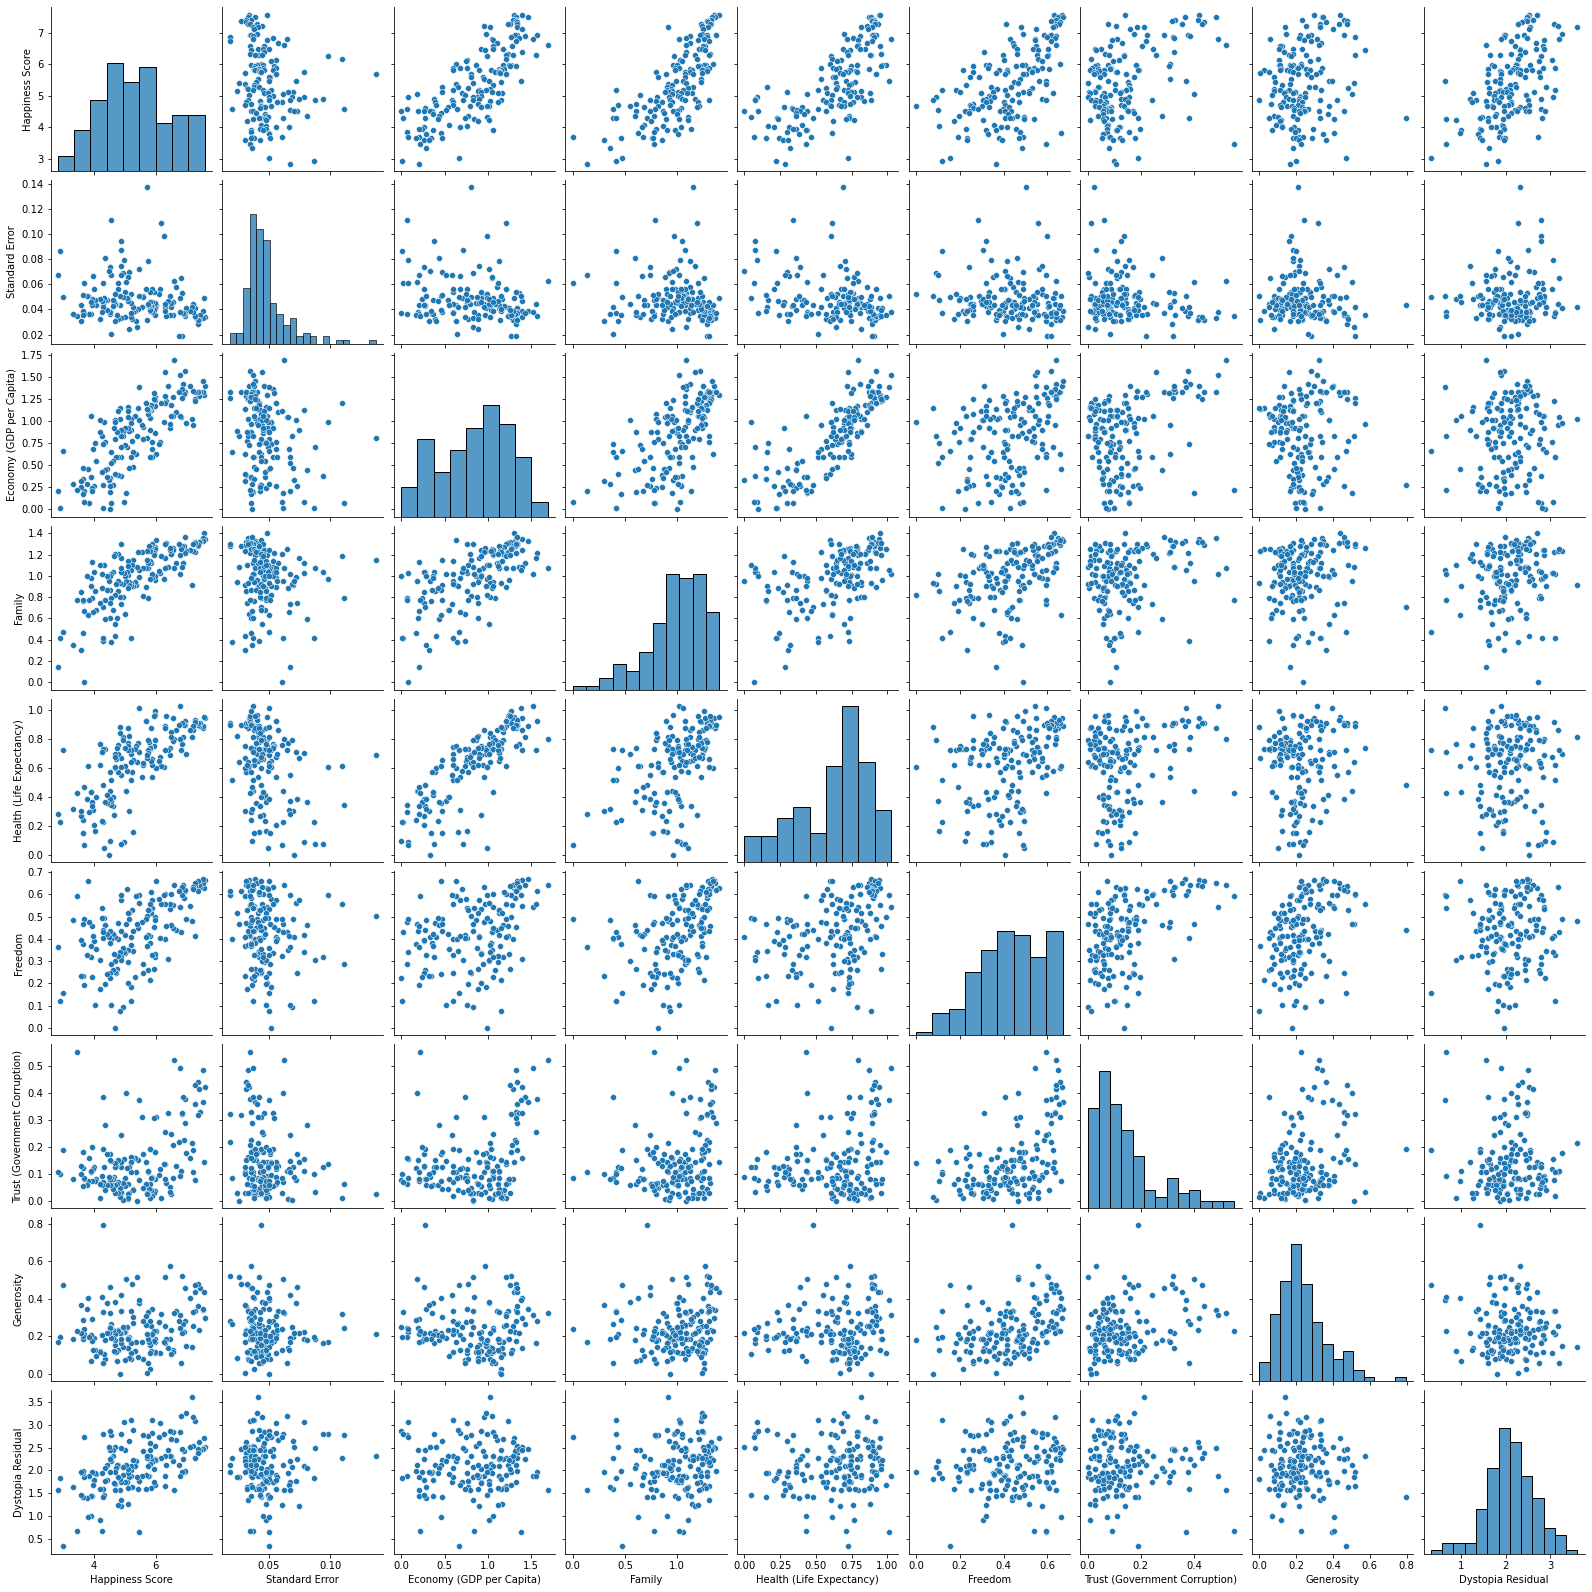

In [40]:
sns.pairplot(df)
plt.show()

Using a Histogram

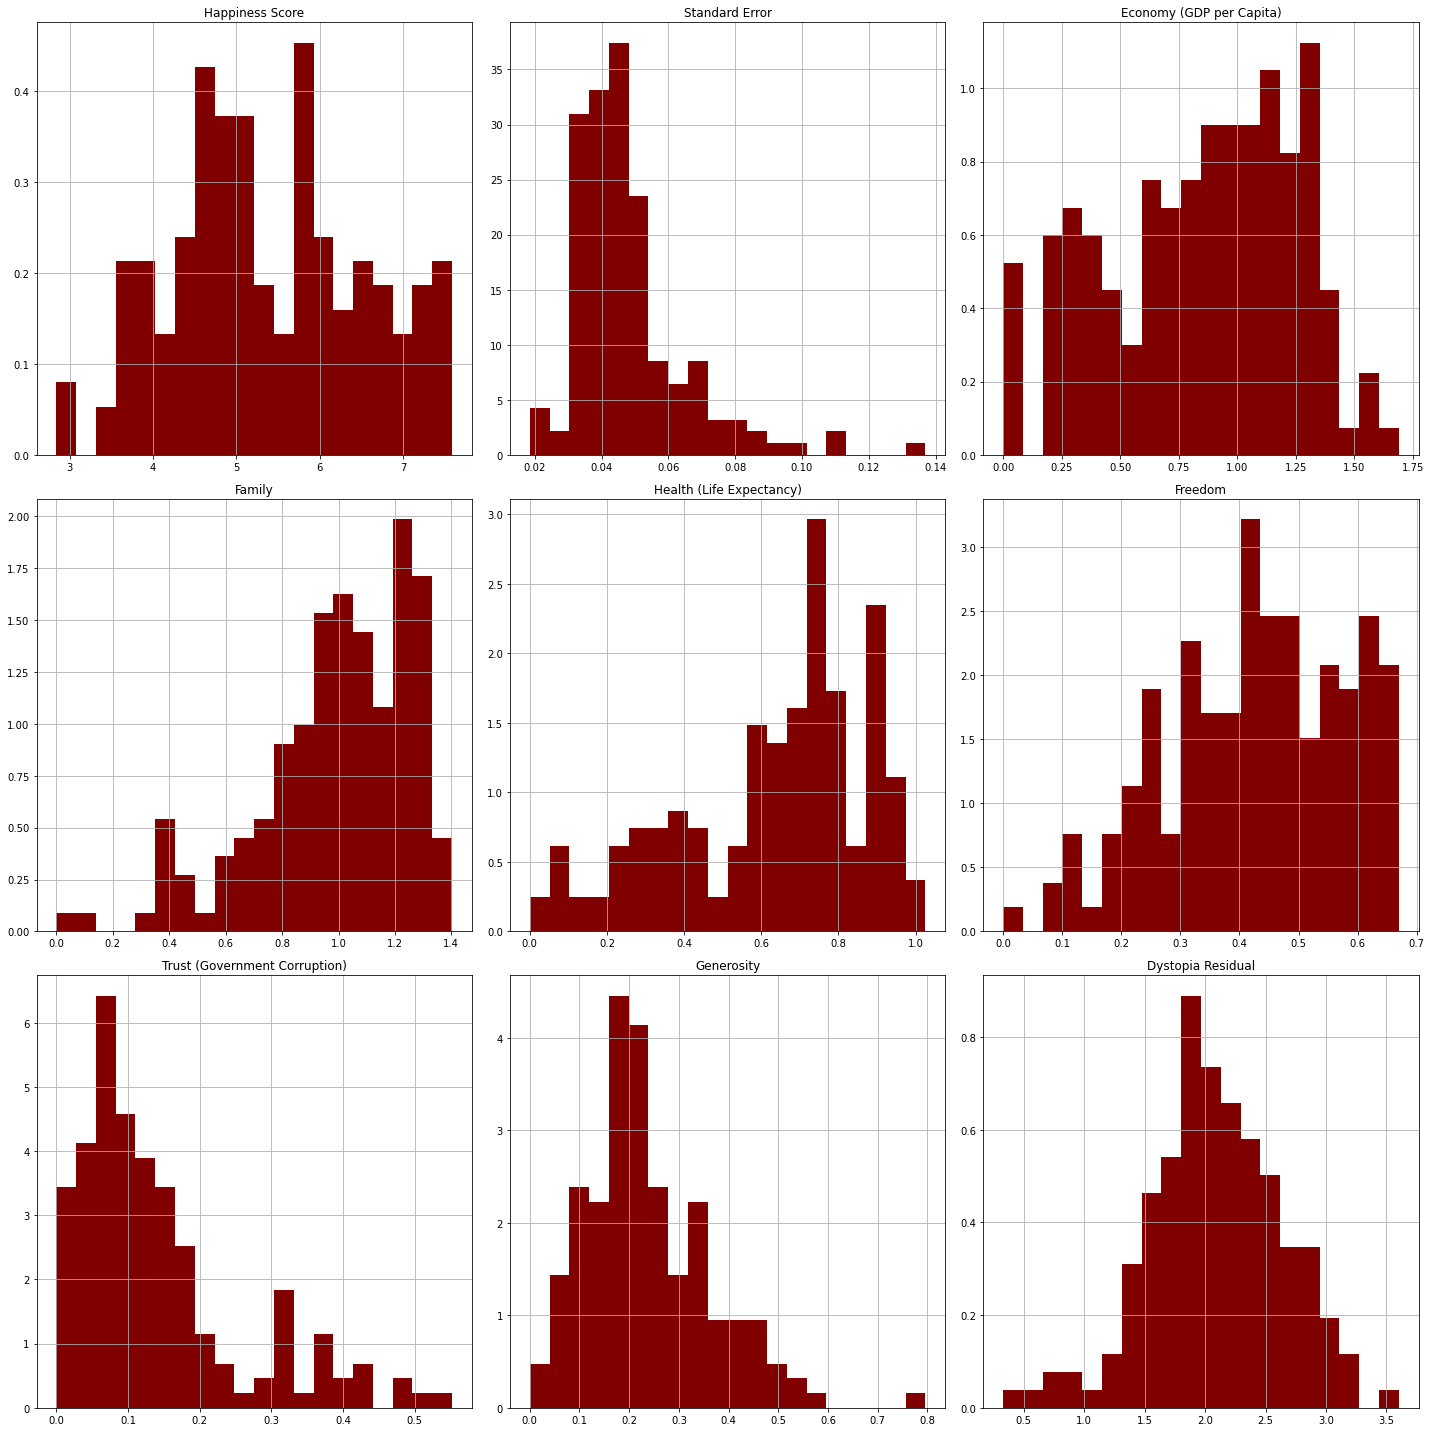

In [41]:
plt.rcParams['figure.figsize'] = (20,20)
df.hist(bins=20, color='maroon', density=True, label='Value', histtype='bar')
plt.tight_layout()
plt.show()

Taking a look at the above Histogram I can see that there are columns with skewness and are not normally distributed. But I will confirm the same using the skew function on the data set.

In [21]:
df.skew()# Checking the skewness of coulmns where acceptable range is between -0.5 to 0.5

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Using Pandas Profiling Report on our new data set

In [42]:
profile2 = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Outlier removal
Acceptable range for skewness is +/-0.5
The feature columns that have skewness are Standard Error, Freedom, Generosity and Dystopia Residual.

Since we already tried retaining the outliers earlier to build our regression models it did not give us proper score therefore attempting again to clean the data by removing the outliers and then will check the model accuracy.

In [43]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df_new=df[(z<3).all(axis=1)]
df_new

Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
150            3.655         0.05141                   0.46534  0.77115   
151            3.587         0.04324                   0.25812  0.85188   
152            3.575         0.03084                   0.31982  0.30285   
154            3.340         0.03656                   0.28665  0.35386   
156            2.905         0.08658                   0.01530  0.41587   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
150                   0.15185  0.46866                        0.17922   
151                   0.27125  0.39493                        0.12832   
152                   0.30335  0.23414                        0.09719   
154                   0.31910  0.48450                        0.08010   
156                   0.22396  0.11850                        0.10062   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
150     0.20165            1.41723  
151     0.21747            1.46494  
152     0.36510            1.95210  
154     0.18260            1.63328  
156     0.19727            1.83302  

[149 rows x 9 columns]

With the help of Z Score method we are able to detect the outliers and have removed them from our data set.

In [44]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 
data_loss

5.69620253164557

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set after removing the outliers.

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [45]:
X = df_new.drop('Happiness Score', axis=1) 
Y = df_new['Happiness Score']

In [46]:
X

Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
150         0.05141                   0.46534  0.77115   
151         0.04324                   0.25812  0.85188   
152         0.03084                   0.31982  0.30285   
154         0.03656                   0.28665  0.35386   
156         0.08658                   0.01530  0.41587   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
150                   0.15185  0.46866                        0.17922   
151                   0.27125  0.39493                        0.12832   
152                   0.30335  0.23414                        0.09719   
154                   0.31910  0.48450                        0.08010   
156                   0.22396  0.11850                        0.10062   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
150     0.20165            1.41723  
151     0.21747            1.46494  
152     0.36510            1.95210  
154     0.18260            1.63328  
156     0.19727            1.83302  

[149 rows x 8 columns]

In [47]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

It clearly shows on the above 2 cells that the feature and label data have been separated successfully using the new data set of 149 rows each.

Scaling

In [48]:
scaler = PowerTransformer(method = 'yeo-johnson')

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Using the 'yeo-johnson' method as 'box-cox' can be used only on positive data. With the help of Power Transformation our outliers should be handled too. Since we do not have much data I am trying not to lose any rows by removing outliers right now. However if needed to increase the accuracy of our model I may perform outlier removal later on.

Comments: We have now removed the outliers to check how the models perform post 5 percent data loss.

In [49]:
X_scaled

Standard Error  Economy (GDP per Capita)    Family  \
0         -0.950337                  1.492454  1.658880   
1          0.378562                  1.194067  2.009125   
2         -1.041401                  1.266612  1.730785   
3         -0.471124                  1.695302  1.540248   
4         -0.799032                  1.269159  1.487718   
..              ...                       ...       ...   
144        0.563000                 -1.052662 -1.047195   
145       -0.068119                 -1.490349 -0.778550   
146       -1.320810                 -1.365216 -2.087389   
147       -0.692726                 -1.433041 -2.010443   
148        2.178766                 -1.938747 -1.906410   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                    1.469636  1.754982                       1.817625   
1                    1.511292  1.442182                       0.329676   
2                    1.053469  1.616037                       1.953400   
3                    1.117188  1.791023                       1.664359   
4                    1.242549  1.477337                       1.541247   
..                        ...       ...                            ...   
144                 -1.707662  0.204409                       0.681035   
145                 -1.435893 -0.300343                       0.188577   
146                 -1.352388 -1.265395                      -0.192843   
147                 -1.309709  0.318123                      -0.434498   
148                 -1.550663 -1.849893                      -0.147274   

     Generosity  Dystopia Residual  
0      0.659579           0.755255  
1      1.562604           1.111168  
2      0.977226           0.706495  
3      1.015018           0.655082  
4      1.682150           0.629030  
..          ...                ...  
144   -0.131736          -1.339678  
145    0.012019          -1.249871  
146    1.134258          -0.327115  
147   -0.312080          -0.932164  
148   -0.172486          -0.553592  

[149 rows x 8 columns]

We see that in the scaled feature format there are positive and negative values in it. And as mentioned if the outliers affect the machine learning models then I will go ahead and remove them else trying my best to retain them.

Comments: I have removed the outliers and suffered a 5 percent data loss in hopes of improving the model accuracy.

Creating the training and testing data sets

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.75, random_state=42, shuffle=True)

I am taking 75 percent of the total data present in the dataset for training purpose and the remaining 25 percent will be used in testing purpose during model building process.

In [51]:
# Model Selection

linear_model = LinearRegression()
svr_model = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtr_model = DecisionTreeRegressor(criterion="poisson", random_state=111)
rfr_model = RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

I have made use of 5 regression algorithms namely linear regression, support vector regression, decision tree regressor, random forest regressor and k neighbors regressor. Used the sklearn page to use the correct parameters for each of the models.

In [52]:
# Training the models

linear_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)
dtr_model.fit(X_train, Y_train)
rfr_model.fit(X_train, Y_train)
knr_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

Now I have trained all my regression models by feeding them with training data sets to ensure they are aware of the pattern that will be required for further predictions.

In [53]:
# Predictions

pred_linear = linear_model.predict(X_test)
pred_svr = svr_model.predict(X_test)
pred_dtr = dtr_model.predict(X_test)
pred_rfr = rfr_model.predict(X_test)
pred_knr = knr_model.predict(X_test)

Evaluation metrics

In [54]:
# RMSE - a lower RMSE is better than a higher one

mse_linear = mean_squared_error(Y_test, pred_linear)
mse_svr = mean_squared_error(Y_test, pred_svr)
mse_dtr = mean_squared_error(Y_test, pred_dtr)
mse_rfr = mean_squared_error(Y_test, pred_rfr)
mse_knr = mean_squared_error(Y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)
rmse_dtr = sqrt(mse_dtr)
rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.06638458610380152
RMSE of Support Vector Regression is:  0.43020959342150195
RMSE of Decision Tree Regressor is:  0.6827919656974976
RMSE of Random Forest Regressor is:  0.5969753616388463
RMSE of K Neighbors Regressor is:  0.34579756208997253


I have used RMSE to check the difference between the actual label and the predicted label for the test features that were provided to the models. The RMSE metrics is basically the root mean squared error and it is always better to have a lower RMSE than a higher one.

In [55]:
# R2 Score for the models

print(f"R2 Score for Linear Regression is: ", r2_score(Y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(Y_test, pred_svr, multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor is: ", r2_score(Y_test, pred_dtr, multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor is: ", r2_score(Y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(Y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  99.61289492395045
R2 Score for Support Vector Regression is:  83.74247075798078
R2 Score for Decision Tree Regressor is:  59.04837243238613
R2 Score for Random Forest Regressor is:  68.69547076860938
R2 Score for K Neighbors Regressor is:  89.49639897867345


Using the R2 score to evaluate the models and check the accuracy by which we should be able to choose our best regression model.

Inference: Comparing the RMSE score and the R2 score I see that Linear Regression has the lowest RMSE score and highest R2 score making it the best model amongst all 5 of the models.

Hyper parameter tuning on the best ML Model

In [56]:
# Linear Regression

lt_param = {'fit_intercept' : [True,False], 'normalize' : [True,False], 
            'copy_X' : [True,False], 'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False]}

I have listed down all the paramteres available for Linear Regression Model and saved it in the variable lt_param.

In [57]:
RSCV = RandomizedSearchCV(LinearRegression(), lt_param, cv=5)

Here I have used the Randomized Search Cross Validatio to look for the best parameters that I can feed in my model.

In [58]:
RSCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [59]:
RSCV.best_params_

{'positive': True,
 'normalize': False,
 'n_jobs': 3,
 'fit_intercept': True,
 'copy_X': False}

With the help of the bestparams option we were able to identify the most fitted paramter list that can be used in our Final model.

In [60]:
Final_Model = LinearRegression(positive=True, normalize=True, n_jobs=10, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(X_train, Y_train)
lr_pred = Final_Model.predict(X_test)
lr_r2_score = r2_score(Y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 99.34437553896682


By using the hyper parameter tuning we were able to get the optimal R2 score value for our Final Model.

Saving the model (using pickle or joblib)

In [64]:
filename = 'FinalModel_2.pkl'
pickle.dump(Final_Model, open(filename, 'wb'))

We can save our final model with the help of pickle or joblib but I am using the pickle method to save my model now.

In [ ]:
Loading the model

In [65]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)*100
print(result)

99.34437553896682


Finally I have loaded the saved model and passed the unseen data set to predict the model score.